In [6]:
import pandas as pd
df = pd.read_csv("cab.csv")

In [7]:
df.head()

,miles,temp,rain,ncabs,price
0,1,30,0,10,20
1,1,38,0,5,40
2,1,25,0,1,50
3,1,20,1,10,50
4,1,15,1,4,80


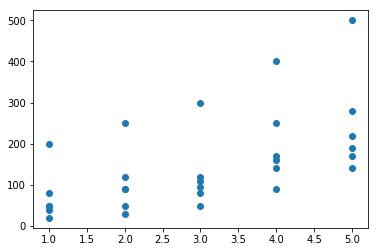

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x=df["miles"],y = df["price"])
plt.show()

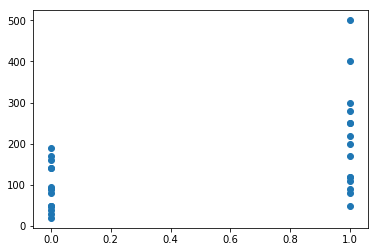

In [9]:
plt.scatter(x=df["rain"],y = df["price"])
plt.show()

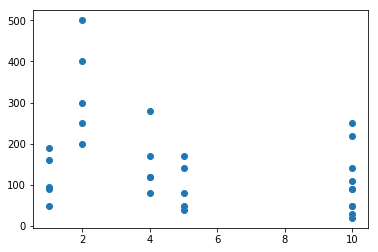

In [10]:
plt.scatter(x=df["ncabs"],y = df["price"])
plt.show()

In [11]:
df.corr()

,miles,temp,rain,ncabs,price
miles,1.000000,0.000000,0.000000,0.000000,0.577134
temp,0.000000,1.000000,-0.859338,0.298096,-0.619816
rain,0.000000,-0.859338,1.000000,0.000000,0.527199
ncabs,0.000000,0.298096,0.000000,1.000000,-0.369060
price,0.577134,-0.619816,0.527199,-0.369060,1.000000


In [14]:
X = df.drop("rain",axis=1)
X

,miles,temp,ncabs,price
0,1,30,10,20
1,1,38,5,40
2,1,25,1,50
3,1,20,10,50
4,1,15,4,80
5,1,10,2,200
6,2,30,10,30
7,2,38,5,50
8,2,25,1,90
9,2,20,10,90


In [15]:
y = df["rain"]
y

0     0
1     0
2     0
3     1
4     1
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    0
13    0
14    0
15    1
16    1
17    1
18    0
19    0
20    0
21    1
22    1
23    1
24    0
25    0
26    0
27    1
28    1
29    1
Name: rain, dtype: int64

In [16]:
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)

Feature set size: (30, 4)
Variable set size: (30,)


In [17]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (27, 4)
Test feature set size: (3, 4)
Training variable set size: (27,)
Test variable set size: (3,)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [21]:
lm = LogisticRegression() # Creating a Linear Regression object 'lm'

In [22]:
lm.fit(X_train,y_train) # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: [0.28470991]


In [24]:
print("The coefficients of the linear model:", lm.coef_)

The coefficients of the linear model: [[-0.91922163 -0.49673547  0.85558917  0.06991101]]


In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

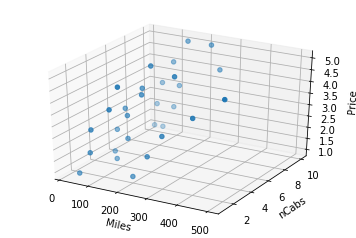

In [67]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df.price, df['ncabs'], df['miles'])
threedee.set_xlabel('Miles')
threedee.set_ylabel('nCabs')
threedee.set_zlabel('Price')
plt.show()

In [28]:
y_train_pred = lm.predict(X_train)

In [29]:
metrics.accuracy_score(y_train,y_train_pred)

1.0

In [30]:
y_test_pred = lm.predict(X_test)

In [31]:
metrics.accuracy_score(y_test,y_test_pred)

1.0